# Homework 4

**Due: 03/01/2018** (Thursday 1st March at 11:59pm).

## Instructions

+ In any case, develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - you can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope. 

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

## Readings

Before attempting the homework, it is probably a good idea to:
+ Read chapter 1, 2 of [Rasmussen](http://www.gaussianprocess.org/gpml/chapters/);
+ Review the slides of lectures 10, 11, & 12; and
+ Review the corresponding lecture handouts.

## Problem 1 - The Mauna Loa CO$_2$ data set

The National Oceanic and Atmospheric Administration (NOAA) has been measuring the levels of atmospheric CO2 at the Mauna Loa, Hawaii. The measurements start on March 1958 and go all the way to Janurary 2016.
The data can be found [here](http://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).
The Python script below, downloads and plots the data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import GPy
%matplotlib inline
from sklearn.linear_model import ARDRegression, LinearRegression
np.set_printoptions(suppress=True)
import scipy
import cPickle as pickle

Text(0,0.5,u'$y$')

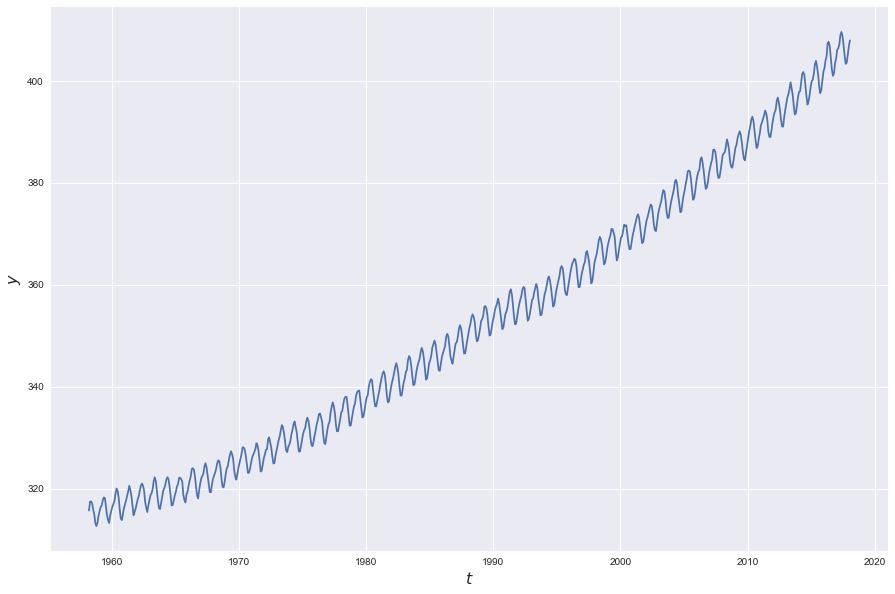

In [2]:
#load data 
data = np.loadtxt('mauna_loa_co2.txt')
t = data[:, 2][:, None]  #time (in decimal dates)
y = data[:, 4][:, None]  #CO2 level (mole fraction in dry air, micromol/mol, abbreviated as ppm)
fig, ax = plt.subplots(1, figsize = (15, 10))
ax.plot(t, y)
ax.set_xlabel('$t$', fontsize = 16)
ax.set_ylabel('$y$', fontsize = 16)

In [1]:
# We need a generic function that computes the design matrix
def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in xrange(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

Overall, we observe a steady growth of CO2 levels. The wiggles correspond to seasonal changes. Since the vast majority of the population inhabits the Northen hemisphere, fuel consumption goes up during the Northen winters. Our goal is to study this data set with the regression techniques we learned in class. Specifically we would like to provide an answer to the following task.
+ **Task 1** Predict the evolution of the CO2 levels from Feb 2018 to Feb 2028 (ten years from now).
+ **Task 2**  Quantify our uncertainty about this prediction.

### Part  A 

Use any Bayesian linear regression technique discussed in class to construct a map between $t$ and $y$. State clearly which basis functions you use and why. We suggest you use automatic relevance determination (ARD) as implemented in [scikitlearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html).

The choice of the candidate basis functions is completely up to you. We expect you to justify your choices and interpret your findings. E.g., "I picked these basis functions because I expected this to happen", or "ARD finally selected these basis functions and this can be interpreted as this and that." 

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

We seem to be capturing the general trend pretty nicely. The amplitude of the seasonal component, however, is not well captured. This can perhaps be fixed with a better choice of basis functions. 

### Part B

In this problem you have to do exactly the same as in Part A, but using Gaussian process regression using ``GPy``. 

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

## Problem 2 - Stochastic model for permeability of oil reservoir

The permeability of the soil is one of the largest unknowns in modeling underground flows. Here, you will create a 2D model of permeability that can be used for propagating uncertainties or as a starting point for model calibration. This is the information that is available to you:
+ You need to build a stochastic model for permeability with as low dimensionality as possible.
+ You need to be able to sample random permeability fields from this model.
+ The permeability is strictly positive.
+ The 2D domain you should consider is $[0, 356]\times[0,670]$ (in meters).
+ Our geologist gave us her best estimate about the permeability field. We have put the results for you in a data file and we show you how to load it and plot it below.
+ When asked how sure she is about the prediction, the geologist gave a standard deviation of about 3.2 on the logarithm of the permeability.
+ She also believes that there are two lengthscales: 50 meters and 10 meters.

Do the following:

a. Write down the mathematical form of the best stochastic model for the permeability you can come up with using the information above. Are you going to use a GP? Are you going to consider a transformed version of the GP? What would the mean be? What would the covariance function be? What would the parameters of the covariance function be?

b. Construct the Karhunen-Loeve expansion of the field using the code provided in lecture 12. You should: 1) use enough quadrature points so that you get a converged Nystrom approximation; 2) use enough terms to cover $95\%$ of the fields energy; 3) Plot the egenvalues of KLE; 4) Plot the first six eigenfunctions of KLE; 5) Plot six samples of the random field.

c. You sent a crew to go and make some measurements of the permeability. Repeate everything you did in b. making use of the new data:
 

|$x_1$ |$x_2$ | $\log K(x_1, x_2)$ |
|------|------|--------------------|
|100.  |200.  | -13.2              |
|300.  |500.  | -25.3              |
 
Here is the mean field provided by the geologist:

Text(0.5,1,u'Mean of the log permeability')

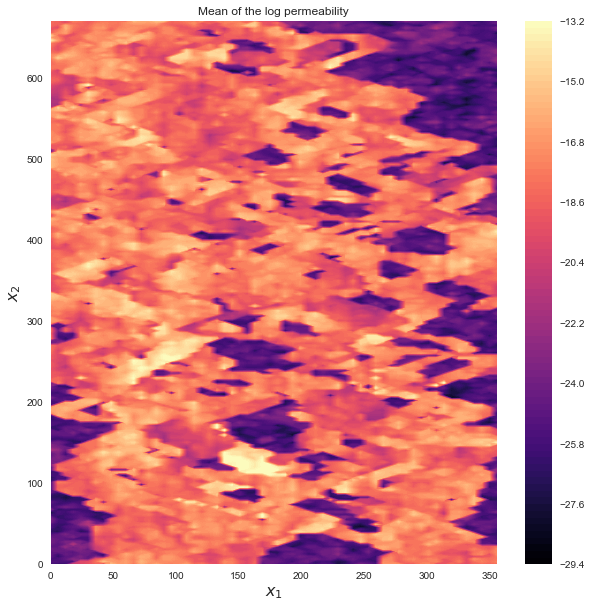

In [12]:
M = np.loadtxt('spe10_permx.dat').T
x1 = np.linspace(0, 356, 60)
x2 = np.linspace(0, 670, 220)
X1, X2 = np.meshgrid(x1, x2)
fig, ax = plt.subplots(1, figsize = (10, 10))
im=ax.contourf(X1, X2, np.log(M), 100, cmap = 'magma')
fig.colorbar(im, ax=ax)
ax.set_xlabel('$x_1$', fontsize = 16)
ax.set_ylabel('$x_2$', fontsize = 16)
ax.set_title('Mean of the log permeability')

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>